In [ ]:
import cv2   # it will allow us to load our images into the script
import numpy as np   # used for reformatting our own images
import tensorflow as tf   # main library used to load data sets, build neural networks, train them, etc.
import matplotlib.pyplot as plt   # used for visualization
from sklearn.model_selection import train_test_split

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print('The shape of the training inputs:', X_train.shape)
print('The shape of the training labels:',y_train.shape)
print('The shape of the testing inputs:',X_test.shape)
print('The shape of the testing labels:',y_test.shape)

The shape of the training inputs: (60000, 28, 28)
The shape of the training labels: (60000,)
The shape of the testing inputs: (10000, 28, 28)
The shape of the testing labels: (10000,)


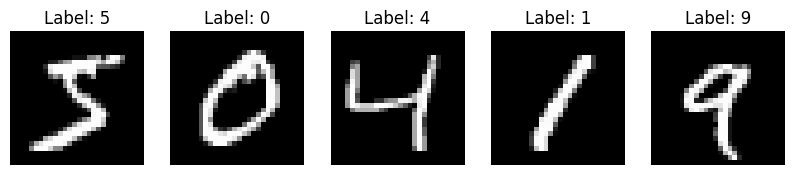

In [ ]:
def plot_images(images, labels, num_images=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.show()

# Örnek 5 görüntü ve etiket
plot_images(X_train, y_train, num_images=5)

In [ ]:
# Görselleri 28x28 boyutlarından flatten işlemi yapıyoruz ve normalize edelim
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32') / 255

In [ ]:
# Flatten edilmiş boyutlarına tekrar bakalım.
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (60000, 784)
X_test shape: (10000, 784)


In [ ]:
# Train ve validation olarak ayıralım.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Sınıfları one-hot encode edelim
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
# Encode edilmiş değerleri görüntüleyelim.
y_train[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [ ]:
# Modeli oluşturma
model = tf.keras.models.Sequential()

In [ ]:
# Input nesnesi olarak tanımlayın
model.add(tf.keras.layers.Input(shape=(28 * 28,)))

# Input katmanı
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))

In [ ]:
# Gizli katmanlar
model.add(tf.keras.layers.Dense(256, activation='relu')) #hidden layer1
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(128, activation='relu')) #hidden layer2
model.add(tf.keras.layers.Dropout(0.3))

In [ ]:
# Output layer. Multi-class sınıflandırma için softmax kullanıyoruz.
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
# Modeli Derleyelim (Compile The Model)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # İzlenecek metrik (doğrulama kaybı)
    patience=3,          #  val_loss iyileşmezse 3 epoch sonra durdur
    restore_best_weights=True,  # En iyi modelin ağırlıklarını geri yükle
    verbose=1            # Durum güncellemelerini yazdır
)

In [ ]:
# Modeli eğitelim
results = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7859 - loss: 0.6770 - val_accuracy: 0.9622 - val_loss: 0.1260
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9512 - loss: 0.1657 - val_accuracy: 0.9718 - val_loss: 0.0924
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9652 - loss: 0.1172 - val_accuracy: 0.9738 - val_loss: 0.0829
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9730 - loss: 0.0914 - val_accuracy: 0.9773 - val_loss: 0.0778
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9762 - loss: 0.0787 - val_accuracy: 0.9787 - val_loss: 0.0669
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9793 - loss: 0.0679 - val_accuracy: 0.9800 - val_loss: 0.0677
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9822 - loss: 0.0573 - val_accuracy: 0.9808 - val_loss: 0.0676
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9841 - loss: 0.0543 - val_accuracy: 

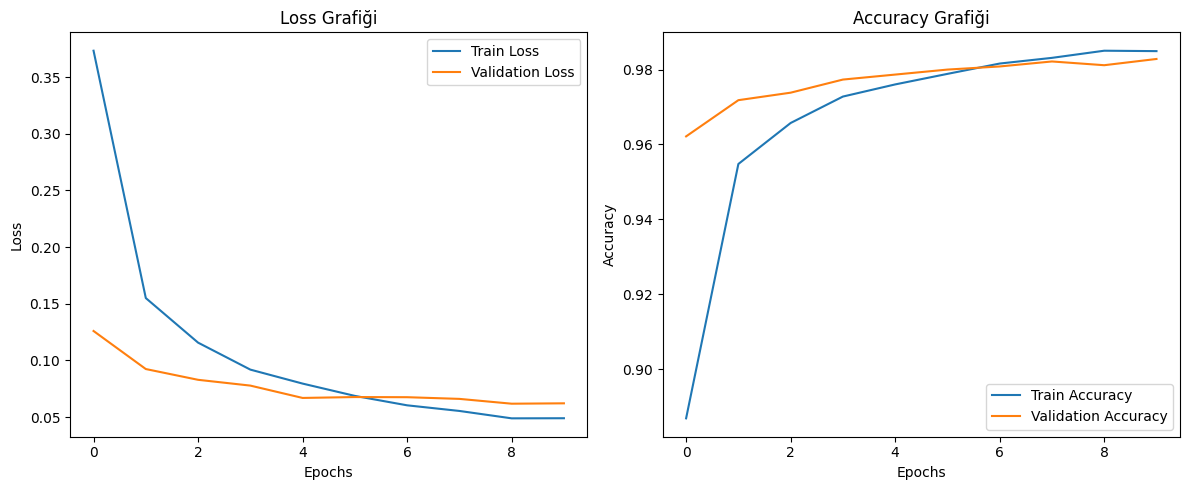

In [ ]:
# Eğitim sonuçlarını görselleştirelim
plt.figure(figsize=(12, 5))

# Loss grafiği
plt.subplot(1, 2, 1)
plt.plot(results.history['loss'], label='Train Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title('Loss Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy grafiği
plt.subplot(1, 2, 2)
plt.plot(results.history['accuracy'], label='Train Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Test seti üzerinde modeli değerlendirelim
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

Test Loss: 0.06744620203971863
Test Accuracy: 0.9815000295639038


In [ ]:
# Test seti ile tahmin yapalım
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Probabilities:  [9.9999988e-01 1.5854153e-14 3.4248601e-10 2.2715063e-13 5.5721292e-11
 8.0363754e-12 1.5770696e-07 4.8123183e-10 3.4626442e-12 1.7039679e-10]


Prediction:  0


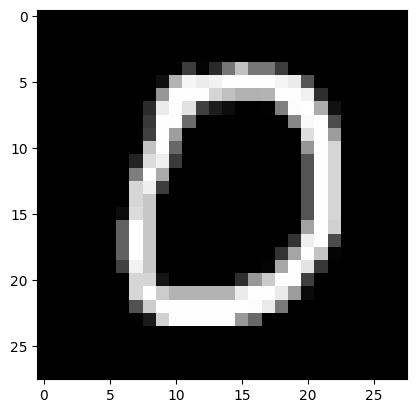

In [ ]:
# let us do prediction for single image

print('Probabilities: ', y_pred[10]);
print('\n')
print('Prediction: ', np.argmax(y_pred[10]))

# visualize the image

plt.imshow(X_test[10].reshape(28, 28), cmap='gray')
plt.show()


Probabilities:  [3.2181729e-06 1.1220755e-04 1.8384637e-03 9.9634677e-01 2.1734313e-06
 2.8438112e-04 5.1222855e-07 2.9664935e-04 8.3868240e-04 2.7703389e-04]


Prediction:  3


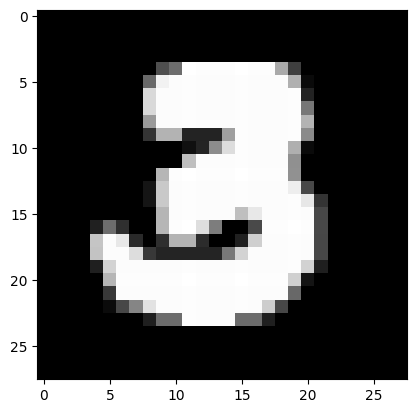

In [ ]:
# let us do prediction for single image

print('Probabilities: ', y_pred[200]);
print('\n')
print('Prediction: ', np.argmax(y_pred[200]))
# visualize the image

plt.imshow(X_test[200].reshape(28, 28), cmap='gray')
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
import keras

In [ ]:
model.save('ysa2.keras')

In [ ]:
model = keras.models.load_model("/content/ysa2.keras")
# Test veri kümesi ile değerlendirme
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test doğruluğu: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9780 - loss: 0.0822
Test doğruluğu: 0.9815000295639038
